# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

In [3]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [4]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [19]:
reg = smf.ols('tip ~ net_bill', data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           5.02e-23
Time:                        18:31:40   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

(0.0, 10.5)

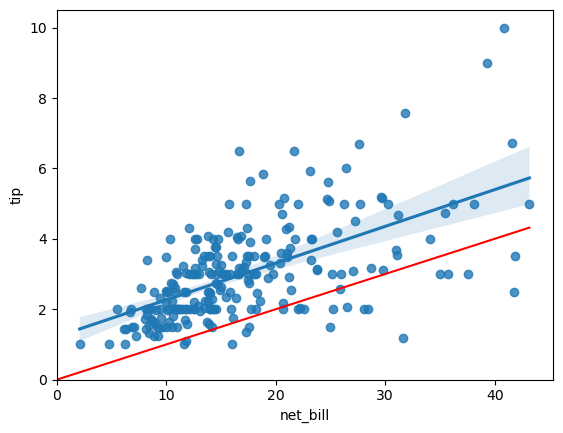

In [18]:
sns.regplot(y='tip', x='net_bill', data=tips[tips['tip_pct']<.5])

x = np.linspace(0,tips['net_bill'].max(),100)
y=.1*x

plt.plot(x,y, '-r', label='linha dos 10%')

plt.xlim(left=0)
plt.ylim(bottom=0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [26]:
reg2 = smf.ols('tip_pct ~ net_bill', data=tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.52e-06
Time:                        18:34:50   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Notei que teve alguns dados iguais como o n de observações e residuos, isso tem a ver com o tamanho da base de dados ?

(0.0, 4.53285)

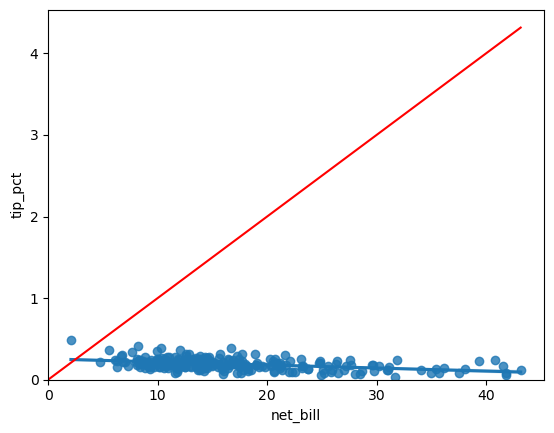

In [28]:
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct']<.5])

x = np.linspace(0,tips['net_bill'].max(),100)
y=.1*x

plt.plot(x,y, '-r', label='linha dos 10%')

plt.xlim(left=0)
plt.ylim(bottom=0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

# analisando os 2 gráficos se estiverem corretos:
- É possivel dizer que em relação a linha de referencia é quase igual tendo um pequeno ajuste no segundo grafico ficando acima de **4**
- ja analisando a linha de tendecia vemos que a descrepancia entre as duas, enquanto no primeiro grafico ela tende a subir no segundo grafico ela tende a descer.
- Não acho que é possivel comparar diretamente os **R²**s pois possuem uma diferença muito grande entre eles.


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [42]:
pred = reg2.fittedvalues
pred

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [48]:
reg3 = smf.ols('tip ~ tip_pct * net_bill', data=tips).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.866e+31
Date:                Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:56:37   Log-Likelihood:                 7983.9
No. Observations:                 244   AIC:                        -1.596e+04
Df Residuals:                     240   BIC:                        -1.595e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9.437e-16   2.93e-16     -3.222      0.001   -1.52e-15   -3.67e-16
tip_pct           4.441e-15   7.32e-16      6.066      0.000       3e-15    5.88e-15
net_bill          2.359e-16   1.77e-17     13.339      0.000    2.01e-16    2.71e-16
tip_pct:net_bill     1.0000   1.01e-16   9.91e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       79.893   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.758
Skew:                          -1.537   Prob(JB):                     3.78e-42
Kurtosis:                       6.053   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
reg3.rsquared

1.0

# em comparação com o primeiro R², esse é ruim..?